In [1]:
# Import required libraries 
import numpy as np
import matplotlib.pyplot as plt
from ClassNeuralNetwork import NeuralNetwork

# from LoadData import load_training_labels, load_training_images
from LoadData import load_images, load_labels
from LoadData import InitialWeights

In [3]:
# Load Data
Images = load_images('train-images-idx3-ubyte.gz')
Labels_Train = load_labels('train-labels-idx1-ubyte.gz')
Test = load_images('t10k-images-idx3-ubyte.gz')
Labels_Test = load_labels('t10k-labels-idx1-ubyte.gz')

row, col = Images.shape  # Shape of Input 60000x784
row1, col1 = Test.shape  # Shape of Input 10000x784
D_Train = np.zeros((row, 10))
D_Train[np.arange(row), Labels_Train] = 1 # Desired Output based on correct Labels for Training Set
D_Test = np.zeros((row1, 10))
D_Test[np.arange(row1), Labels_Test] = 1 # Desired Output based on correct Labels for Test Set

In [9]:
# Call the Neural Network class
model = NeuralNetwork(Images, D_Train, act_func='Tanh', loss='CE', momentum=0.9, 
                      layer_info=np.array([40, 40]), lr_info=np.array([4, 1]), split=0.8, epsilon=5, maxIter=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
# Train it
w_opt, r = model.train_NN()

Epoch: 0 eta: 4.000 Loss_Train 12052.36 Loss_Val 3111.78 Error_Train 7.05% Error_Val 7.45%
Epoch: 1 eta: 4.000 Loss_Train 8990.76 Loss_Val 2571.61 Error_Train 5.25% Error_Val 6.21%
Epoch: 2 eta: 4.000 Loss_Train 7334.66 Loss_Val 2335.15 Error_Train 4.16% Error_Val 5.72%
Epoch: 3 eta: 4.000 Loss_Train 6244.02 Loss_Val 2197.69 Error_Train 3.54% Error_Val 5.47%
Epoch: 4 eta: 4.000 Loss_Train 5314.68 Loss_Val 2115.61 Error_Train 2.93% Error_Val 5.11%
Epoch: 5 eta: 4.000 Loss_Train 4626.97 Loss_Val 2037.23 Error_Train 2.53% Error_Val 4.86%
Optimal Weights Reached!!!!!


In [11]:
# Prediction on test dataset
raw_predict, predict = model.predict(Test, w_opt)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
# Prediction on test dataset
raw_predict, predict, loss, error = model.predict_loss(Test, D_Test,w_opt)
print(error)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


458


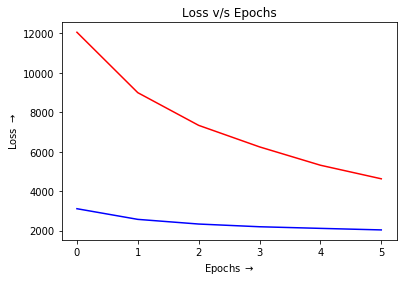

In [12]:
# Plot Loss
plt.plot(r[:, 0], r[:, 1], 'r', label='Training Loss')
plt.plot(r[:, 0], r[:, 2], 'b', label='Validation Loss')
plt.xlabel(r'Epochs $\rightarrow$')
plt.ylabel(r'Loss $\rightarrow$')
plt.title('Loss v/s Epochs')
plt.show()

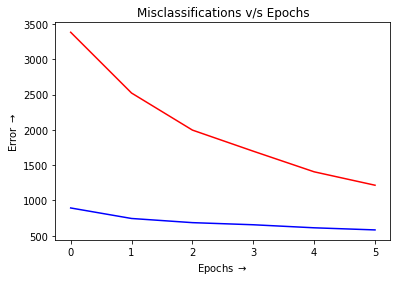

In [13]:
# Plot error
plt.plot(r[:, 0], r[:, 3], 'r', label='Training Error')
plt.plot(r[:, 0], r[:, 4], 'b', label='Validation Error')
plt.xlabel(r'Epochs $\rightarrow$')
plt.ylabel(r'Error $\rightarrow$')
plt.title('Misclassifications v/s Epochs')
plt.show()